# Calculating BLEU scores for Google vs Deepl

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from nltk import word_tokenize

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ashleywang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Reading the csv file and saving the df as 'poems'

In [2]:
poems = pd.read_csv("span_eng_poems_correct.csv")

In [3]:
poems

,Unnamed: 0,orig_span,hum_trans,goog_trans,deepl_trans,translator_name,time_period
0,0,"¿Qué farayu o qué serád de mibi? \nHabibi, \nn...","What shall I do? What will become of me? \nOh,...",What farayu or what will become of mibi?\nHabi...,"What farayu or what will bed of mibi?\nHabibi,...",anon,med
1,1,"De los sos ojos tan fuertemientre llorando, \n...","His eyes flooding with bitter tears, the Cid c...","From your eyes so strong while crying,\nHe tur...","Of your eyes so strongly weeping,\nI turned my...",John A. Crow,med
2,2,"¡Merced, ya rey señor por amor de caridad! \nL...","Justice and mercy, my Lord the King, I beseech...","Mercy, now king, sir, for the love of charity!...","Merced, ya rey señor por amor de caridad!\nThe...",John Hookham Frere,med
3,3,Sant Migael de la Tunba es un grand monesterio...,San Miguel de la Tumba is a convent vast and w...,"Sant Migael de la Tunba is a great monastery,\...","Sant Migael de la Tunba is a great monastery,\...",Henry Wadsworth Longfellow,med
4,4,"Colgava delant ella un buen aventadero, \nen e...",Descending low before her face a screen of fea...,There was a good window hanging in front of he...,"It hung in front of it a good adventadero,\nin...",Henry Wadsworth Longfellow,med
...,...,...,...,...,...,...,...
260,260,"Éste, que ves, engaño colorido, \nque del arte...",This artifice of colors that you see \nWhich b...,"This one, what do you see, colorful deception,...","This, that you see, colorful deception,\nthat ...",John A. Crow,baroque
261,261,De buscar a Narciso fatigada \nsin permitir so...,"Seeking Narcissus in my weariness, \nWith neve...",Searching for Narcissus tired\nwithout allowin...,Of searching for Narcissus weary\nwithout allo...,Roderick Gill,baroque
262,262,"Esta tarde, mi bien, cuando te hablaba, \ncomo...","This afternoon. my Love, as I pled weeping, \n...","This afternoon, my good, when I spoke to you,\...","This afternoon, my good, when I was talking to...",John A. Crow,baroque
263,263,"Detente, sombra de mi bien esquivo, \nimagen d...","Stay, fleeting shadow of my love whose chain \...","Stop, shadow of my elusive good,\nimage of the...","Stop, shadow of my elusive good,\nimage of the...",John A. Crow,baroque


### Creating a function for calculating BLEU scores

In [4]:
def calculate_bleu(ref, hyp):
    return sentence_bleu([word_tokenize(ref)], word_tokenize(hyp))

### Running the function and adding new columns for these BLEU scores

In [8]:
poems['bleu_google'] = poems.apply(lambda row: calculate_bleu(row['goog_trans'], row['hum_trans']), axis=1)
# poems['bleu_deepl'] = poems.apply(lambda row: calculate_bleu(row['deepl_trans'], row['hum_trans']), axis=1)

/Users/ashleywang/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/ashleywang/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/ashleywang/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram

In [10]:
poems['bleu_deepl'] = poems.apply(lambda row: calculate_bleu(row['deepl_trans'], row['hum_trans']), axis = 1)

/Users/ashleywang/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/ashleywang/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/ashleywang/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram

In [11]:
# The df now has BLEU scores (yay!)
poems

,Unnamed: 0,orig_span,hum_trans,goog_trans,deepl_trans,translator_name,time_period,bleu_google,bleu_deepl
0,0,"¿Qué farayu o qué serád de mibi? \nHabibi, \nn...","What shall I do? What will become of me? \nOh,...",What farayu or what will become of mibi?\nHabi...,"What farayu or what will bed of mibi?\nHabibi,...",anon,med,8.543706e-02,1.525594e-78
1,1,"De los sos ojos tan fuertemientre llorando, \n...","His eyes flooding with bitter tears, the Cid c...","From your eyes so strong while crying,\nHe tur...","Of your eyes so strongly weeping,\nI turned my...",John A. Crow,med,4.624918e-02,1.278284e-78
2,2,"¡Merced, ya rey señor por amor de caridad! \nL...","Justice and mercy, my Lord the King, I beseech...","Mercy, now king, sir, for the love of charity!...","Merced, ya rey señor por amor de caridad!\nThe...",John Hookham Frere,med,4.310849e-02,4.772286e-02
3,3,Sant Migael de la Tunba es un grand monesterio...,San Miguel de la Tumba is a convent vast and w...,"Sant Migael de la Tunba is a great monastery,\...","Sant Migael de la Tunba is a great monastery,\...",Henry Wadsworth Longfellow,med,6.237107e-155,6.161869e-155
4,4,"Colgava delant ella un buen aventadero, \nen e...",Descending low before her face a screen of fea...,There was a good window hanging in front of he...,"It hung in front of it a good adventadero,\nin...",Henry Wadsworth Longfellow,med,4.948828e-155,4.913094e-155
...,...,...,...,...,...,...,...,...,...
260,260,"Éste, que ves, engaño colorido, \nque del arte...",This artifice of colors that you see \nWhich b...,"This one, what do you see, colorful deception,...","This, that you see, colorful deception,\nthat ...",John A. Crow,baroque,1.386495e-01,1.459722e-01
261,261,De buscar a Narciso fatigada \nsin permitir so...,"Seeking Narcissus in my weariness, \nWith neve...",Searching for Narcissus tired\nwithout allowin...,Of searching for Narcissus weary\nwithout allo...,Roderick Gill,baroque,3.946151e-02,5.889924e-155
262,262,"Esta tarde, mi bien, cuando te hablaba, \ncomo...","This afternoon. my Love, as I pled weeping, \n...","This afternoon, my good, when I spoke to you,\...","This afternoon, my good, when I was talking to...",John A. Crow,baroque,5.804326e-02,1.806241e-78
263,263,"Detente, sombra de mi bien esquivo, \nimagen d...","Stay, fleeting shadow of my love whose chain \...","Stop, shadow of my elusive good,\nimage of the...","Stop, shadow of my elusive good,\nimage of the...",John A. Crow,baroque,5.716907e-02,5.876032e-02


### Calculating the average of the respective BLEU scores

In [12]:
np.mean(poems['bleu_google'])

0.10171460119215482

In [36]:
np.std(poems['bleu_google'])

0.12848630563675795

In [13]:
np.mean(poems['bleu_deepl'])

0.11593677629919172

In [37]:
np.std(poems['bleu_deepl'])

0.14149587855116288

### Testing if difference is significant

In [14]:
from scipy import stats

# BLEU scores for translation system A and B
bleu_scores_google = poems['bleu_google']
bleu_scores_deepl = poems['bleu_deepl']

# Calculate the differences
differences = [a - b for a, b in zip(bleu_scores_google, bleu_scores_deepl)]

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(bleu_scores_google, bleu_scores_deepl)

# Print the results
print("Paired t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value to chosen significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two translation systems' BLEU scores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two translation systems' BLEU scores.")


Paired t-test results:
t-statistic: -5.868426602045139
p-value: 1.3146105041558543e-08
Reject the null hypothesis: There is a significant difference between the two translation systems' BLEU scores.


### Comparing Google Translate and DeepL Translations

In [16]:
poems['bleu_google_deepl'] = poems.apply(lambda row: calculate_bleu(row['goog_trans'], row['deepl_trans']), axis=1)

In [18]:
np.mean(poems['bleu_google_deepl'])

0.5261551702169961

In [19]:
bleu_scores_deepl

0       1.525594e-78
1       1.278284e-78
2       4.772286e-02
3      6.161869e-155
4      4.913094e-155
           ...      
260     1.459722e-01
261    5.889924e-155
262     1.806241e-78
263     5.876032e-02
264     7.983425e-79
Name: bleu_deepl, Length: 265, dtype: float64

### Visualizations

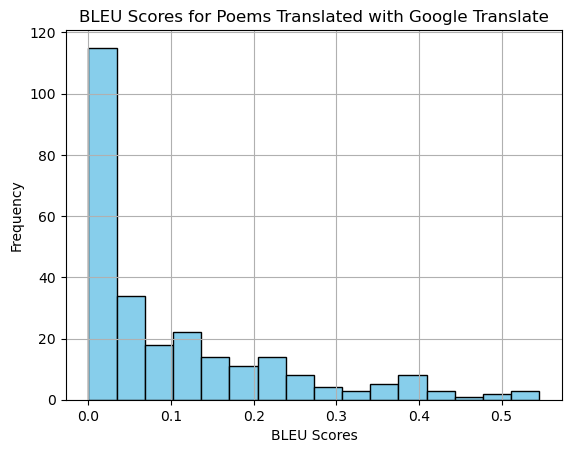

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

num_bins = int(np.sqrt(len(bleu_scores_google)))

# Step 3: Plot the histogram
plt.hist(bleu_scores_google, bins=num_bins, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('BLEU Scores')
plt.ylabel('Frequency')
plt.title('BLEU Scores for Poems Translated with Google Translate')
plt.grid(True)
plt.show()


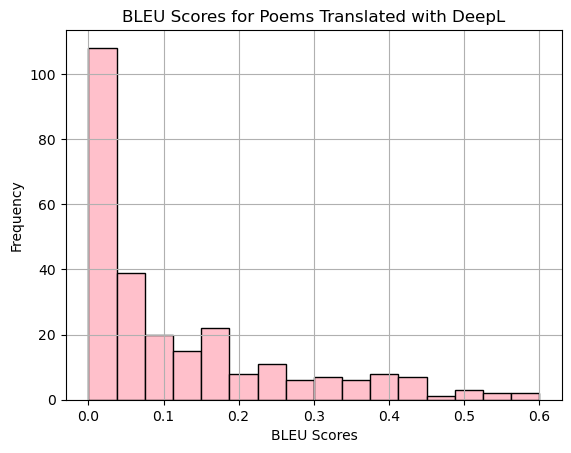

In [35]:
num_bins_deepl = int(np.sqrt(len(bleu_scores_deepl)))

# Step 3: Plot the histogram
plt.hist(bleu_scores_deepl, bins=num_bins_deepl, color='pink', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('BLEU Scores')
plt.ylabel('Frequency')
plt.title('BLEU Scores for Poems Translated with DeepL')
plt.grid(True)
plt.show()

In [22]:
bleu_scores_google_time_period = poems.groupby('time_period')['bleu_google'].mean()

In [23]:
print(bleu_scores_google_time_period)

time_period
baroque           0.027660
fifteenth_cent    0.044506
gen_1898          0.176850
med               0.023975
modernism         0.124909
neoclassical      0.015070
renaissance       0.014849
romantic          0.063028
twentieth_cent    0.233104
Name: bleu_google, dtype: float64


In [27]:
poems['time_period'] = poems['time_period'].replace('med', 'medieval')

In [29]:
poems.to_csv('final_poems.csv', index=False)

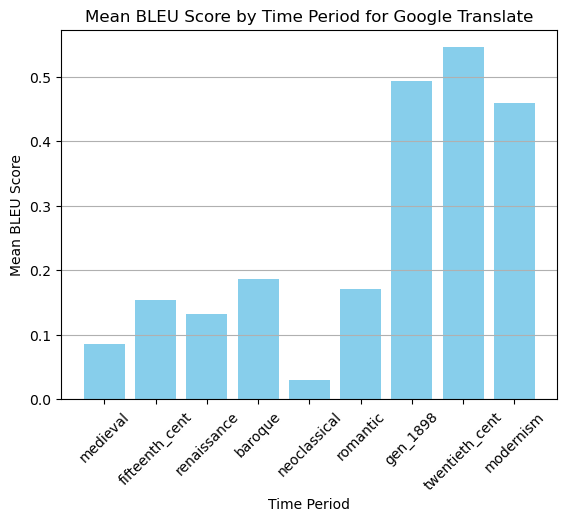

In [33]:
time_period_order = ['medieval', 'fifteenth_cent', 'renaissance', 'baroque', 'neoclassical', 'romantic', 'gen_1898', 'twentieth_cent', 'modernism']

# Convert the 'time_period' column to categorical data type with the desired order
poems['time_period'] = pd.Categorical(poems['time_period'], categories=time_period_order, ordered=True)

# Sort the DataFrame by the categorical 'time_period' column
df = poems.sort_values('time_period')

# Plot the data
plt.bar(df['time_period'], df['bleu_google'], color='skyblue')
plt.xlabel('Time Period')
plt.ylabel('Mean BLEU Score')
plt.title('Mean BLEU Score by Time Period for Google Translate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.show()

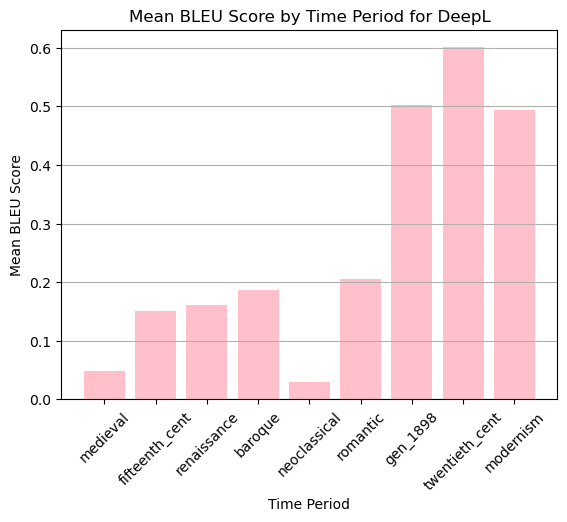

In [34]:
plt.bar(df['time_period'], df['bleu_deepl'], color='pink')
plt.xlabel('Time Period')
plt.ylabel('Mean BLEU Score')
plt.title('Mean BLEU Score by Time Period for DeepL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.show()

### Assessing Lexical Variety

#### Mean Characters Per Word

In [38]:
poems

,Unnamed: 0,orig_span,hum_trans,goog_trans,deepl_trans,translator_name,time_period,bleu_google,bleu_deepl,bleu_google_deepl
0,0,"¿Qué farayu o qué serád de mibi? \nHabibi, \nn...","What shall I do? What will become of me? \nOh,...",What farayu or what will become of mibi?\nHabi...,"What farayu or what will bed of mibi?\nHabibi,...",anon,medieval,8.543706e-02,1.525594e-78,0.456806
1,1,"De los sos ojos tan fuertemientre llorando, \n...","His eyes flooding with bitter tears, the Cid c...","From your eyes so strong while crying,\nHe tur...","Of your eyes so strongly weeping,\nI turned my...",John A. Crow,medieval,4.624918e-02,1.278284e-78,0.328969
2,2,"¡Merced, ya rey señor por amor de caridad! \nL...","Justice and mercy, my Lord the King, I beseech...","Mercy, now king, sir, for the love of charity!...","Merced, ya rey señor por amor de caridad!\nThe...",John Hookham Frere,medieval,4.310849e-02,4.772286e-02,0.365387
3,3,Sant Migael de la Tunba es un grand monesterio...,San Miguel de la Tumba is a convent vast and w...,"Sant Migael de la Tunba is a great monastery,\...","Sant Migael de la Tunba is a great monastery,\...",Henry Wadsworth Longfellow,medieval,6.237107e-155,6.161869e-155,0.441980
4,4,"Colgava delant ella un buen aventadero, \nen e...",Descending low before her face a screen of fea...,There was a good window hanging in front of he...,"It hung in front of it a good adventadero,\nin...",Henry Wadsworth Longfellow,medieval,4.948828e-155,4.913094e-155,0.213682
...,...,...,...,...,...,...,...,...,...,...
260,260,"Éste, que ves, engaño colorido, \nque del arte...",This artifice of colors that you see \nWhich b...,"This one, what do you see, colorful deception,...","This, that you see, colorful deception,\nthat ...",John A. Crow,baroque,1.386495e-01,1.459722e-01,0.545032
261,261,De buscar a Narciso fatigada \nsin permitir so...,"Seeking Narcissus in my weariness, \nWith neve...",Searching for Narcissus tired\nwithout allowin...,Of searching for Narcissus weary\nwithout allo...,Roderick Gill,baroque,3.946151e-02,5.889924e-155,0.457394
262,262,"Esta tarde, mi bien, cuando te hablaba, \ncomo...","This afternoon. my Love, as I pled weeping, \n...","This afternoon, my good, when I spoke to you,\...","This afternoon, my good, when I was talking to...",John A. Crow,baroque,5.804326e-02,1.806241e-78,0.438294
263,263,"Detente, sombra de mi bien esquivo, \nimagen d...","Stay, fleeting shadow of my love whose chain \...","Stop, shadow of my elusive good,\nimage of the...","Stop, shadow of my elusive good,\nimage of the...",John A. Crow,baroque,5.716907e-02,5.876032e-02,0.422347


In [40]:
def mean_chars_per_word(speech):
  # split speeches into separate words to count characters
  words = speech.split()
  # count characters of each word of a speech using a for loop
  # to find how many characters a word has, use len function
  if len(words) > 0:
    mean_characters = sum(len(w) for w in words)/len(words)
  # print the value of the mean
    return mean_characters
  else:
    return 0

# calculate mean characters for every speech, add that column to speeches_party_gender

lexical_poems = pd.read_csv("span_eng_poems_correct.csv")


In [41]:
lexical_poems

,Unnamed: 0,orig_span,hum_trans,goog_trans,deepl_trans,translator_name,time_period
0,0,"¿Qué farayu o qué serád de mibi? \nHabibi, \nn...","What shall I do? What will become of me? \nOh,...",What farayu or what will become of mibi?\nHabi...,"What farayu or what will bed of mibi?\nHabibi,...",anon,med
1,1,"De los sos ojos tan fuertemientre llorando, \n...","His eyes flooding with bitter tears, the Cid c...","From your eyes so strong while crying,\nHe tur...","Of your eyes so strongly weeping,\nI turned my...",John A. Crow,med
2,2,"¡Merced, ya rey señor por amor de caridad! \nL...","Justice and mercy, my Lord the King, I beseech...","Mercy, now king, sir, for the love of charity!...","Merced, ya rey señor por amor de caridad!\nThe...",John Hookham Frere,med
3,3,Sant Migael de la Tunba es un grand monesterio...,San Miguel de la Tumba is a convent vast and w...,"Sant Migael de la Tunba is a great monastery,\...","Sant Migael de la Tunba is a great monastery,\...",Henry Wadsworth Longfellow,med
4,4,"Colgava delant ella un buen aventadero, \nen e...",Descending low before her face a screen of fea...,There was a good window hanging in front of he...,"It hung in front of it a good adventadero,\nin...",Henry Wadsworth Longfellow,med
...,...,...,...,...,...,...,...
260,260,"Éste, que ves, engaño colorido, \nque del arte...",This artifice of colors that you see \nWhich b...,"This one, what do you see, colorful deception,...","This, that you see, colorful deception,\nthat ...",John A. Crow,baroque
261,261,De buscar a Narciso fatigada \nsin permitir so...,"Seeking Narcissus in my weariness, \nWith neve...",Searching for Narcissus tired\nwithout allowin...,Of searching for Narcissus weary\nwithout allo...,Roderick Gill,baroque
262,262,"Esta tarde, mi bien, cuando te hablaba, \ncomo...","This afternoon. my Love, as I pled weeping, \n...","This afternoon, my good, when I spoke to you,\...","This afternoon, my good, when I was talking to...",John A. Crow,baroque
263,263,"Detente, sombra de mi bien esquivo, \nimagen d...","Stay, fleeting shadow of my love whose chain \...","Stop, shadow of my elusive good,\nimage of the...","Stop, shadow of my elusive good,\nimage of the...",John A. Crow,baroque


In [42]:
lexical_poems['mwc_span'] = lexical_poems['orig_span'].apply(mean_chars_per_word)
lexical_poems['mwc_human'] = lexical_poems['hum_trans'].apply(mean_chars_per_word)
lexical_poems['mwc_google'] = lexical_poems['goog_trans'].apply(mean_chars_per_word)
lexical_poems['mwc_deepl'] = lexical_poems['deepl_trans'].apply(mean_chars_per_word)

In [43]:
lexical_poems

,Unnamed: 0,orig_span,hum_trans,goog_trans,deepl_trans,translator_name,time_period,mwc_span,mwc_human,mwc_google,mwc_deepl
0,0,"¿Qué farayu o qué serád de mibi? \nHabibi, \nn...","What shall I do? What will become of me? \nOh,...",What farayu or what will become of mibi?\nHabi...,"What farayu or what will bed of mibi?\nHabibi,...",anon,med,4.796296,3.765432,4.206349,4.156250
1,1,"De los sos ojos tan fuertemientre llorando, \n...","His eyes flooding with bitter tears, the Cid c...","From your eyes so strong while crying,\nHe tur...","Of your eyes so strongly weeping,\nI turned my...",John A. Crow,med,4.540845,4.297741,4.442359,4.449735
2,2,"¡Merced, ya rey señor por amor de caridad! \nL...","Justice and mercy, my Lord the King, I beseech...","Mercy, now king, sir, for the love of charity!...","Merced, ya rey señor por amor de caridad!\nThe...",John Hookham Frere,med,4.567073,4.384256,4.416901,4.336073
3,3,Sant Migael de la Tunba es un grand monesterio...,San Miguel de la Tumba is a convent vast and w...,"Sant Migael de la Tunba is a great monastery,\...","Sant Migael de la Tunba is a great monastery,\...",Henry Wadsworth Longfellow,med,4.588889,4.414634,4.595745,4.260417
4,4,"Colgava delant ella un buen aventadero, \nen e...",Descending low before her face a screen of fea...,There was a good window hanging in front of he...,"It hung in front of it a good adventadero,\nin...",Henry Wadsworth Longfellow,med,4.931034,4.824176,4.269841,4.500000
...,...,...,...,...,...,...,...,...,...,...,...
260,260,"Éste, que ves, engaño colorido, \nque del arte...",This artifice of colors that you see \nWhich b...,"This one, what do you see, colorful deception,...","This, that you see, colorful deception,\nthat ...",John A. Crow,baroque,4.720930,4.598039,4.353535,4.400000
261,261,De buscar a Narciso fatigada \nsin permitir so...,"Seeking Narcissus in my weariness, \nWith neve...",Searching for Narcissus tired\nwithout allowin...,Of searching for Narcissus weary\nwithout allo...,Roderick Gill,baroque,4.619048,4.564516,4.428571,4.250000
262,262,"Esta tarde, mi bien, cuando te hablaba, \ncomo...","This afternoon. my Love, as I pled weeping, \n...","This afternoon, my good, when I spoke to you,\...","This afternoon, my good, when I was talking to...",John A. Crow,baroque,4.722222,4.660550,4.676768,4.742268
263,263,"Detente, sombra de mi bien esquivo, \nimagen d...","Stay, fleeting shadow of my love whose chain \...","Stop, shadow of my elusive good,\nimage of the...","Stop, shadow of my elusive good,\nimage of the...",John A. Crow,baroque,4.904762,4.189655,4.530000,4.635417


In [44]:
columns_to_mean = ['mwc_span', 'mwc_human', 'mwc_google', 'mwc_deepl']

# Calculate means of selected columns
mean_mwc = lexical_poems[columns_to_mean].mean()

# Create a new DataFrame to store means
mean_mwc_df = pd.DataFrame(mean_mwc, columns=['mean'])

# Reset index to make columns accessible
mean_mwc_df.reset_index(inplace=True)

# Rename columns for clarity
mean_mwc_df.rename(columns={'index': 'column_name'}, inplace=True)

print(mean_mwc_df)

  column_name      mean
0    mwc_span  4.510375
1   mwc_human  4.457797
2  mwc_google  4.369213
3   mwc_deepl  4.327753


#### Words with at least 7 characters

In [45]:
def w7c(speech):
  list = []
  words = speech.split()
  if len(words) > 0:
    for w in words:
      if len(w) >= 7:
        list.append(w)
    return len(list)/len(words)
  else:
    return 0

In [48]:
lexical_poems['7_span'] = lexical_poems['orig_span'].apply(w7c)
lexical_poems['7_human'] = lexical_poems['hum_trans'].apply(w7c)
lexical_poems['7_google'] = lexical_poems['goog_trans'].apply(w7c)
lexical_poems['7_deepl'] = lexical_poems['deepl_trans'].apply(w7c)

In [49]:
columns_to_mean_2 = ['7_span', '7_human', '7_google', '7_deepl']

# Calculate means of selected columns
mean_7 = lexical_poems[columns_to_mean_2].mean()

# Create a new DataFrame to store means
mean_7_df = pd.DataFrame(mean_7, columns=['mean'])

# Reset index to make columns accessible
mean_7_df.reset_index(inplace=True)

# Rename columns for clarity
mean_7_df.rename(columns={'index': 'column_name'}, inplace=True)

print(mean_7_df)

  column_name      mean
0      7_span  0.224814
1     7_human  0.169810
2    7_google  0.170330
3     7_deepl  0.168072


#### Mean syllables per word

In [50]:
!pip install pyphen

  Obtaining dependency information for pyphen from https://files.pythonhosted.org/packages/a1/5d/a545d71eba7e031ffd4c670b18b7c7c8b128d0fd0ca79914bd40ab98a456/pyphen-0.15.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:0000:010:01


In [51]:
# @title Test syllable counter
test_word = 'wonderfully' # @param {type:"string"}
import pyphen
dic = pyphen.Pyphen (lang="en_US")

print (dic.inserted(test_word))
print (f"Number of syllables={len(dic.inserted (test_word).split('-'))}")

won-der-ful-ly
Number of syllables=4


In [52]:
def mean_word_syllables(speech):
  words = speech.split()
  syllables = sum(len(dic.inserted(w).split('-')) for w in words)
  mean_syllables = syllables/len(words)
  return mean_syllables

In [53]:
lexical_poems['mws_span'] = lexical_poems['orig_span'].apply(mean_word_syllables)
lexical_poems['mws_human'] = lexical_poems['hum_trans'].apply(mean_word_syllables)
lexical_poems['mws_google'] = lexical_poems['goog_trans'].apply(mean_word_syllables)
lexical_poems['mws_deepl'] = lexical_poems['deepl_trans'].apply(mean_word_syllables)

In [55]:
columns_to_mean_3 = ['mws_span', 'mws_human', 'mws_google', 'mws_deepl']

# Calculate means of selected columns
mean_mws = lexical_poems[columns_to_mean_3].mean()

# Create a new DataFrame to store means
mean_mws_df = pd.DataFrame(mean_mws, columns=['mean'])

# Reset index to make columns accessible
mean_mws_df.reset_index(inplace=True)

# Rename columns for clarity
mean_mws_df.rename(columns={'index': 'column_name'}, inplace=True)

print(mean_mws_df)

  column_name      mean
0    mws_span  1.467205
1   mws_human  1.265370
2  mws_google  1.278860
3   mws_deepl  1.272025


#### Words with at least 3 syllables

In [56]:
def w3sy(speech):
  list = []
  words = speech.split()
  for w in words:
    syllables = len(dic.inserted(w).split('-'))
    if syllables >= 3:
      list.append(syllables)
  return len(list)/len(words)

In [57]:
lexical_poems['3_syl_span'] = lexical_poems['orig_span'].apply(w3sy)
lexical_poems['3_syl_human'] = lexical_poems['hum_trans'].apply(w3sy)
lexical_poems['3_syl_google'] = lexical_poems['goog_trans'].apply(w3sy)
lexical_poems['3_syl_deepl'] = lexical_poems['deepl_trans'].apply(w3sy)

In [58]:
columns_to_mean_4 = ['3_syl_span', '3_syl_human', '3_syl_google', '3_syl_deepl']

# Calculate means of selected columns
mean_3_syl = lexical_poems[columns_to_mean_4].mean()

# Create a new DataFrame to store means
mean_3_syl_df = pd.DataFrame(mean_3_syl, columns=['mean'])

# Reset index to make columns accessible
mean_3_syl_df.reset_index(inplace=True)

# Rename columns for clarity
mean_3_syl_df.rename(columns={'index': 'column_name'}, inplace=True)

print(mean_3_syl_df)

    column_name      mean
0    3_syl_span  0.093627
1   3_syl_human  0.042753
2  3_syl_google  0.051950
3   3_syl_deepl  0.049516


### Testing Significance for Means

In [59]:
mean_mwc_df

,column_name,mean
0,mwc_span,4.510375
1,mwc_human,4.457797
2,mwc_google,4.369213
3,mwc_deepl,4.327753


In [64]:
lexical_poems

,Unnamed: 0,orig_span,hum_trans,goog_trans,deepl_trans,translator_name,time_period,mwc_span,mwc_human,mwc_google,...,7_google,7_deepl,mws_span,mws_human,mws_google,mws_deepl,3_syl_span,3_syl_human,3_syl_google,3_syl_deepl
0,0,"¿Qué farayu o qué serád de mibi? \nHabibi, \nn...","What shall I do? What will become of me? \nOh,...",What farayu or what will become of mibi?\nHabi...,"What farayu or what will bed of mibi?\nHabibi,...",anon,med,4.796296,3.765432,4.206349,...,0.063492,0.078125,1.314815,1.123457,1.174603,1.125000,0.074074,0.012346,0.047619,0.031250
1,1,"De los sos ojos tan fuertemientre llorando, \n...","His eyes flooding with bitter tears, the Cid c...","From your eyes so strong while crying,\nHe tur...","Of your eyes so strongly weeping,\nI turned my...",John A. Crow,med,4.540845,4.297741,4.442359,...,0.176944,0.201058,1.369014,1.164271,1.276139,1.283069,0.076056,0.010267,0.053619,0.052910
2,2,"¡Merced, ya rey señor por amor de caridad! \nL...","Justice and mercy, my Lord the King, I beseech...","Mercy, now king, sir, for the love of charity!...","Merced, ya rey señor por amor de caridad!\nThe...",John Hookham Frere,med,4.567073,4.384256,4.416901,...,0.172770,0.169863,1.382114,1.196415,1.248826,1.227397,0.071138,0.023383,0.052582,0.046575
3,3,Sant Migael de la Tunba es un grand monesterio...,San Miguel de la Tumba is a convent vast and w...,"Sant Migael de la Tunba is a great monastery,\...","Sant Migael de la Tunba is a great monastery,\...",Henry Wadsworth Longfellow,med,4.588889,4.414634,4.595745,...,0.202128,0.125000,1.588889,1.317073,1.351064,1.281250,0.133333,0.065041,0.095745,0.072917
4,4,"Colgava delant ella un buen aventadero, \nen e...",Descending low before her face a screen of fea...,There was a good window hanging in front of he...,"It hung in front of it a good adventadero,\nin...",Henry Wadsworth Longfellow,med,4.931034,4.824176,4.269841,...,0.111111,0.193548,1.465517,1.263736,1.238095,1.290323,0.086207,0.032967,0.047619,0.048387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,"Éste, que ves, engaño colorido, \nque del arte...",This artifice of colors that you see \nWhich b...,"This one, what do you see, colorful deception,...","This, that you see, colorful deception,\nthat ...",John A. Crow,baroque,4.720930,4.598039,4.353535,...,0.252525,0.250000,1.534884,1.323529,1.363636,1.390000,0.127907,0.049020,0.080808,0.110000
261,261,De buscar a Narciso fatigada \nsin permitir so...,"Seeking Narcissus in my weariness, \nWith neve...",Searching for Narcissus tired\nwithout allowin...,Of searching for Narcissus weary\nwithout allo...,Roderick Gill,baroque,4.619048,4.564516,4.428571,...,0.201681,0.179688,1.552381,1.298387,1.344538,1.289062,0.123810,0.048387,0.067227,0.046875
262,262,"Esta tarde, mi bien, cuando te hablaba, \ncomo...","This afternoon. my Love, as I pled weeping, \n...","This afternoon, my good, when I spoke to you,\...","This afternoon, my good, when I was talking to...",John A. Crow,baroque,4.722222,4.660550,4.676768,...,0.212121,0.216495,1.466667,1.293578,1.333333,1.309278,0.066667,0.036697,0.060606,0.051546
263,263,"Detente, sombra de mi bien esquivo, \nimagen d...","Stay, fleeting shadow of my love whose chain \...","Stop, shadow of my elusive good,\nimage of the...","Stop, shadow of my elusive good,\nimage of the...",John A. Crow,baroque,4.904762,4.189655,4.530000,...,0.200000,0.208333,1.500000,1.181034,1.330000,1.354167,0.130952,0.017241,0.100000,0.104167


In [63]:
means = mean_mwc_df['mean']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(means, means, means, means)  # Provide means multiple times

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("There are significant differences between at least one pair of means.")
else:
    print("There are no significant differences between the means.")

F-statistic: 0.0
p-value: 1.0
There are no significant differences between the means.
